# The main focus of this project shall be divided in 3 parts:

*   The influence of scoring goals in the win probabillity for the home team
*   Goals distribution throughout matches
*   Build a Hypothesis Test on whether there is a significant negative correlation between the matches played and a player's mean goal rate

however, even though these 3 are focus of the project, in the buildup process, i shall also observe and gather interesting insights, even though they are less relevant than the 3 topics we are focusing on.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
c_games = pd.read_csv("/content/club_games.csv")
events = pd.read_csv("/content/game_events.csv")
players = pd.read_csv("/content/players.csv")
lineups = pd.read_csv("/content/game_lineups.csv")
c_games = c_games.drop(["own_position","opponent_position"], axis = 1)
players = players[["player_id","name","country_of_birth","height_in_cm","highest_market_value_in_eur"]]

In [3]:
c_games["total_goals"] = c_games["own_goals"] + c_games["opponent_goals"]
c_games[["club_id","own_goals","opponent_id","opponent_goals","total_goals"]] = c_games[["club_id","own_goals","opponent_id","opponent_goals","total_goals"]].astype("Int64")
events[["player_in_id","player_assist_id"]] = events[["player_in_id","player_assist_id"]].astype("Int64")

Initially, i imported the datasets we shall be needing for this project. If you want to see more information on these datasets, read the dataset_info file.

After that, i did a quick data preparation on the datasets, understanding each column, and  selecting the most relevant ones for our goal.


For our first analysis, before we dive into the goals distribution throughout the minutes of the match, we shall observe  the distribution of number of total goals per match.

For that, we shall use the c_games dataset.


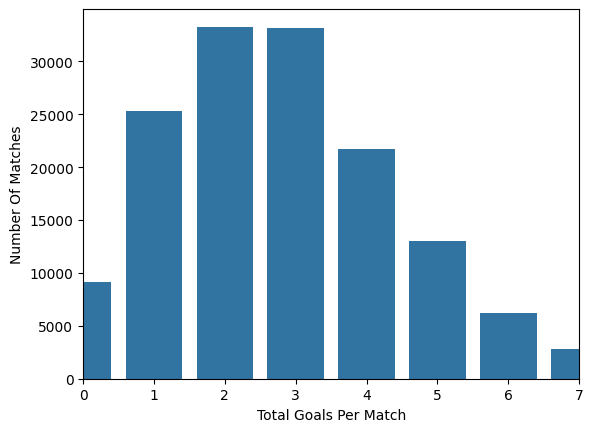

total_goals
2     0.224836
3     0.224052
1       0.1709
4     0.146783
5     0.087943
0     0.062083
6     0.042087
7     0.019226
8     0.007782
9     0.005458
11    0.002405
10    0.001865
13    0.001554
15    0.000797
12     0.00073
17    0.000581
14    0.000243
19     0.00023
21    0.000108
23    0.000081
16    0.000081
29    0.000068
27    0.000027
25    0.000027
20    0.000014
33    0.000014
26    0.000014
31    0.000014
Name: proportion, dtype: Float64


In [4]:
sns.countplot(data = c_games, x = "total_goals")
plt.xlim(0,7)
plt.xlabel("Total Goals Per Match")
plt.ylabel("Number Of Matches")
plt.show()
print(c_games["total_goals"].value_counts(normalize= True))

In the plotted Barplot, we can see that the most common number of goals per match is 2-3 goals per match. When we quantify the proportion, we shall discover that the probability of having 1,2 or 3 total goals per match, is approximately  65%. And the probability of a match having more than 4 goals, is approximately 17%

Another Interesting relationship to study is, how much does the amount of goals scored by the home team, influence the probability of that team winning the match.

(0.0, 8.0)

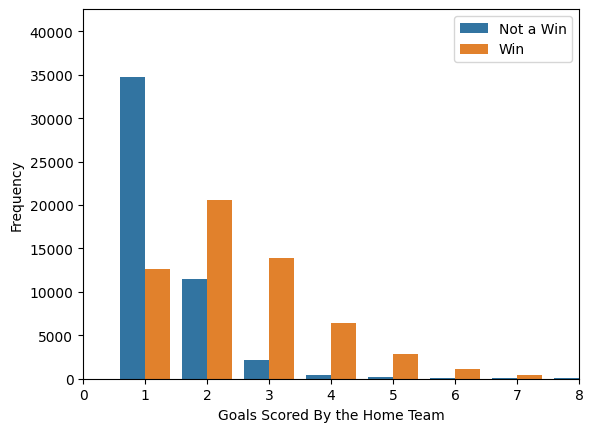

In [5]:
sns.countplot(data = c_games, x = "own_goals",hue= "is_win")
plt.xlabel("Goals Scored By the Home Team")
plt.ylabel("Frequency")
plt.legend(["Not a Win","Win"])
plt.xlim(0,8)

In [6]:

print("Probability of Win with scored goals = 2\n\n",c_games[c_games["own_goals"] == 2]["is_win"].value_counts(normalize = True))
#After that, scoring 3,4 and 5 goals, makes  the loss probability drop massively, going to 13.1%, 2.4% and 0.66% respectively.
print("\nProbability of Win with scored goals = 3\n\n",c_games[c_games["own_goals"] == 3]["is_win"].value_counts(normalize = True))
print("\nProbability of Win with scored goals = 4\n\n",c_games[c_games["own_goals"] == 4]["is_win"].value_counts(normalize = True))
print("\nProbability of Win with scored goals = 5\n\n",c_games[c_games["own_goals"] == 5]["is_win"].value_counts(normalize = True))

Probability of Win with scored goals = 2

 is_win
1    0.641516
0    0.358484
Name: proportion, dtype: float64

Probability of Win with scored goals = 3

 is_win
1    0.86591
0    0.13409
Name: proportion, dtype: float64

Probability of Win with scored goals = 4

 is_win
1    0.929878
0    0.070122
Name: proportion, dtype: float64

Probability of Win with scored goals = 5

 is_win
1    0.930118
0    0.069882
Name: proportion, dtype: float64


**As** we can see, teams scoring 1 or less goals,  are most likely to lose the match, however, when they score 2 goals,
# the win probability goes to **62,5%** and loss to **37.5%.**

Basically, there is still a 1/3 chance of losing the match. But when the team scores 3 goals, the win probability increases and the loss chance drops massively, being **86.6%** and **13.4%** respectively.

##Now let's dive deeper and back into the second focused topic : Goals distribution throughout the match.

,proportion
1st_half,
0,0.566318
1,0.433682


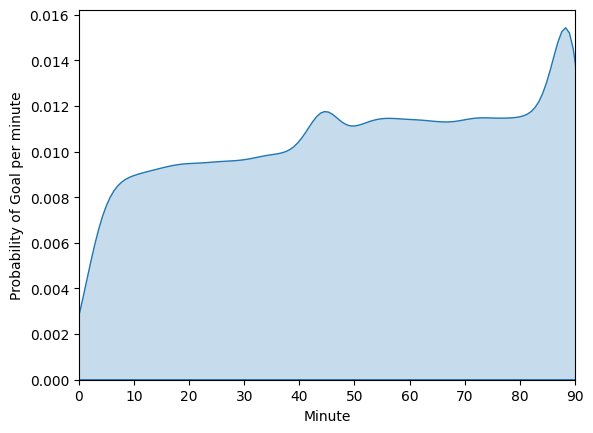

In [7]:
goals = events[events["type"] == "Goals"].copy()
sns.kdeplot(goals["minute"], fill = True)
plt.xlim(0,90)
plt.xlabel("Minute")
plt.ylabel("Probability of Goal per minute")
goals["1st_half"] = np.where(goals["minute"] < 46, 1, 0)
goals["1st_half"].value_counts(normalize = True)


###Firstly, we can observe that there are more goals in the 45th minute than any other minute. This is due to the 45th minute being considered as the 1st half extra minutes, and also the 2nd half first whole minute
### Now, analyzing the 1st vs 2nd half goals:
###the frequency of goals in the 2nd half is way bigger than in the 1st half.
##The **final 10 minutes of the game**, is one of the most crucial and probable moments of a team to concede
##as we can see in the plot, the probability of having a goal in the final minutes, almost doubles.

## the probability of scoring a goal in the 1st half vs 2nd half, is 43.5% and 56.5% respectively.

In [8]:
from scipy.stats import  spearmanr

##Let's build the hypothesis test, and we shall establish the significance level to be = 0.9
#H0 (null-hypothesis) - **There is no** correlation between number of matches played and the player mean goal rate
#H1 (alternative-hypothesis) = **There is a** negative corrrelation between the number of matches played and the player mean goal rate

we will use the spearman correlation test, because this test does not assume a linear relationship between the variables

spearman_corr, p_value = spearmanr()

In [9]:
total_appearances = lineups["player_id"].value_counts().rename("total_appearances")
name = lineups["player_name"]
goals["player_name"] = name
total_goals = goals['player_id'].value_counts().rename("total_goals")
merge1 = pd.merge(goals,total_appearances, on = "player_id", how = "left")
goals = pd.merge(merge1,total_goals, on = "player_id", how = "left")



In [29]:
hyp_test_df = goals[["player_name","total_appearances","total_goals"]].drop_duplicates(subset = "player_name")
hyp_test_df["mean_goal_rate"] = hyp_test_df["total_goals"]/hyp_test_df["total_appearances"]
hyp_test_df = hyp_test_df.dropna(subset = "total_appearances")


##Here i merged the goals dataframe with some relevant columns, and prepared the data in the dataframe. I had to drop over 800 rows because there was a problem in the data collecting. all of the 15160 players had their names registered, and goals registered as well, but over 800 of them had no matches registered.

In [30]:
spearman_corr, p_value = spearmanr(hyp_test_df["total_appearances"], hyp_test_df["mean_goal_rate"])
print(f" The correlation is {spearman_corr}, with a p-value of {p_value}")

 The correlation is -0.18626649201015721, with a p-value of 1.7210426233301711e-112


##After the hypothesis test, we see that there is a  weak correlation, only **18.6**% of negative influence between the variables. Since the p-value is approximately 0 ( and less than 0.10) , **we need to refuse to accept H0** and with a significance level of 10%,  conclude that there is indeed a **negative correlation** between the number of matches played and the player's mean goal rate.

##This means that, the more matches the player gets involved in, the more his mean goal rate is likely to decrease.